Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Loading the dataset

In [2]:
dataset = pd.read_csv('../Datasets/loan_data.csv')

Analyzing the dataset

In [3]:
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
dataset.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
dataset.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

<AxesSubplot:>

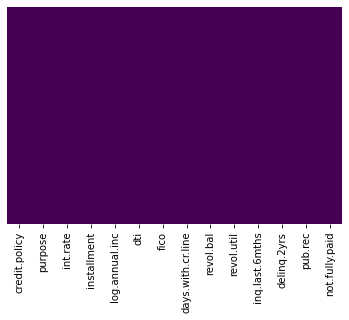

In [6]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

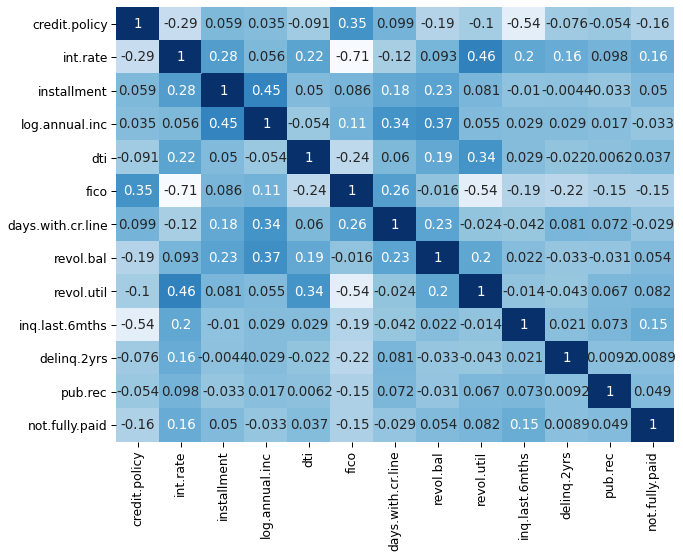

In [7]:
plt.figure(figsize=(10,8))
sns.set_context('paper', font_scale=1.4)

dataset_correlation = dataset.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(dataset_correlation, annot=True,cbar=False,cmap='Blues')

Storing the required column values in variable in X and y for train test split

In [8]:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y = dataset.iloc[:, 13].values

In [9]:
cat = ['purpose']

In [10]:
data = pd.get_dummies(dataset, columns=cat, drop_first=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [12]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
# onehotencoder = OneHotEncoder(categorical_features = [0])
# X = onehotencoder.fit_transform(X).toarray()
X[:, 1].dtype

dtype('O')

Spliting the data for training and testing

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(7183, 13)
(7183,)
(2395, 13)
(2395,)


 Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting Decision Tree Classification to the Training set

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=10, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [17]:
classifier.score(X_train, y_train)

0.8712237226785465

Predicting the Test set results

In [18]:
y_pred = classifier.predict(X_test)

Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1923,   91],
       [ 356,   25]], dtype=int64)

Ploting confusing matrix

<AxesSubplot:>

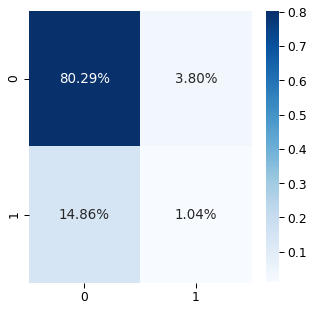

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_ylim([0,2])

sns.set_context('paper', font_scale=1.4)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

Scoring the classifier

In [21]:
result = classifier.score(X_test, y_test)
print(result)

0.8133611691022965


Classification Report

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      2014
           1       0.22      0.07      0.10       381

    accuracy                           0.81      2395
   macro avg       0.53      0.51      0.50      2395
weighted avg       0.74      0.81      0.77      2395



Finding the optimium value for maximum depth for our decision tree

In [23]:
error_rate = []
for i in range(1,40):
 classifier = DecisionTreeClassifier(max_depth=i,criterion = 'entropy', random_state = 0)
 classifier.fit(X_train,y_train)
 pred_i = classifier.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.15908141962421712 at max_depth value = 0


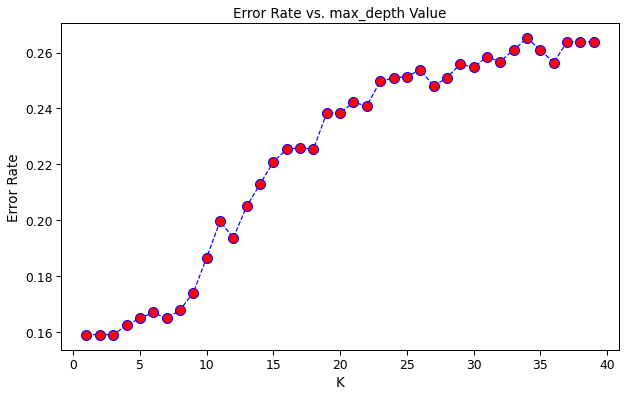

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. max_depth Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at max_depth value =",error_rate.index(min(error_rate)))

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=1, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [26]:
result = classifier.score(X_test, y_test)
print(result)

0.8409185803757829


Ploting the tree for our classifier

In [27]:
from sklearn import tree

[Text(167.4, 163.07999999999998, 'X[0] <= -0.776\nentropy = 0.635\nsamples = 7183\nvalue = [6031, 1152]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.862\nsamples = 1389\nvalue = [993, 396]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.559\nsamples = 5794\nvalue = [5038, 756]')]

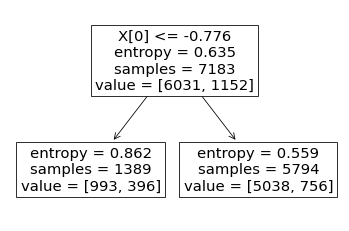

In [28]:
tree.plot_tree(classifier) 

Decision Tree for IRIS dataset

In [29]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

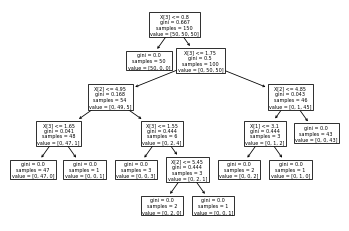

In [30]:
tree.plot_tree(clf)

Ploting the tree using graphviz library

In [31]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

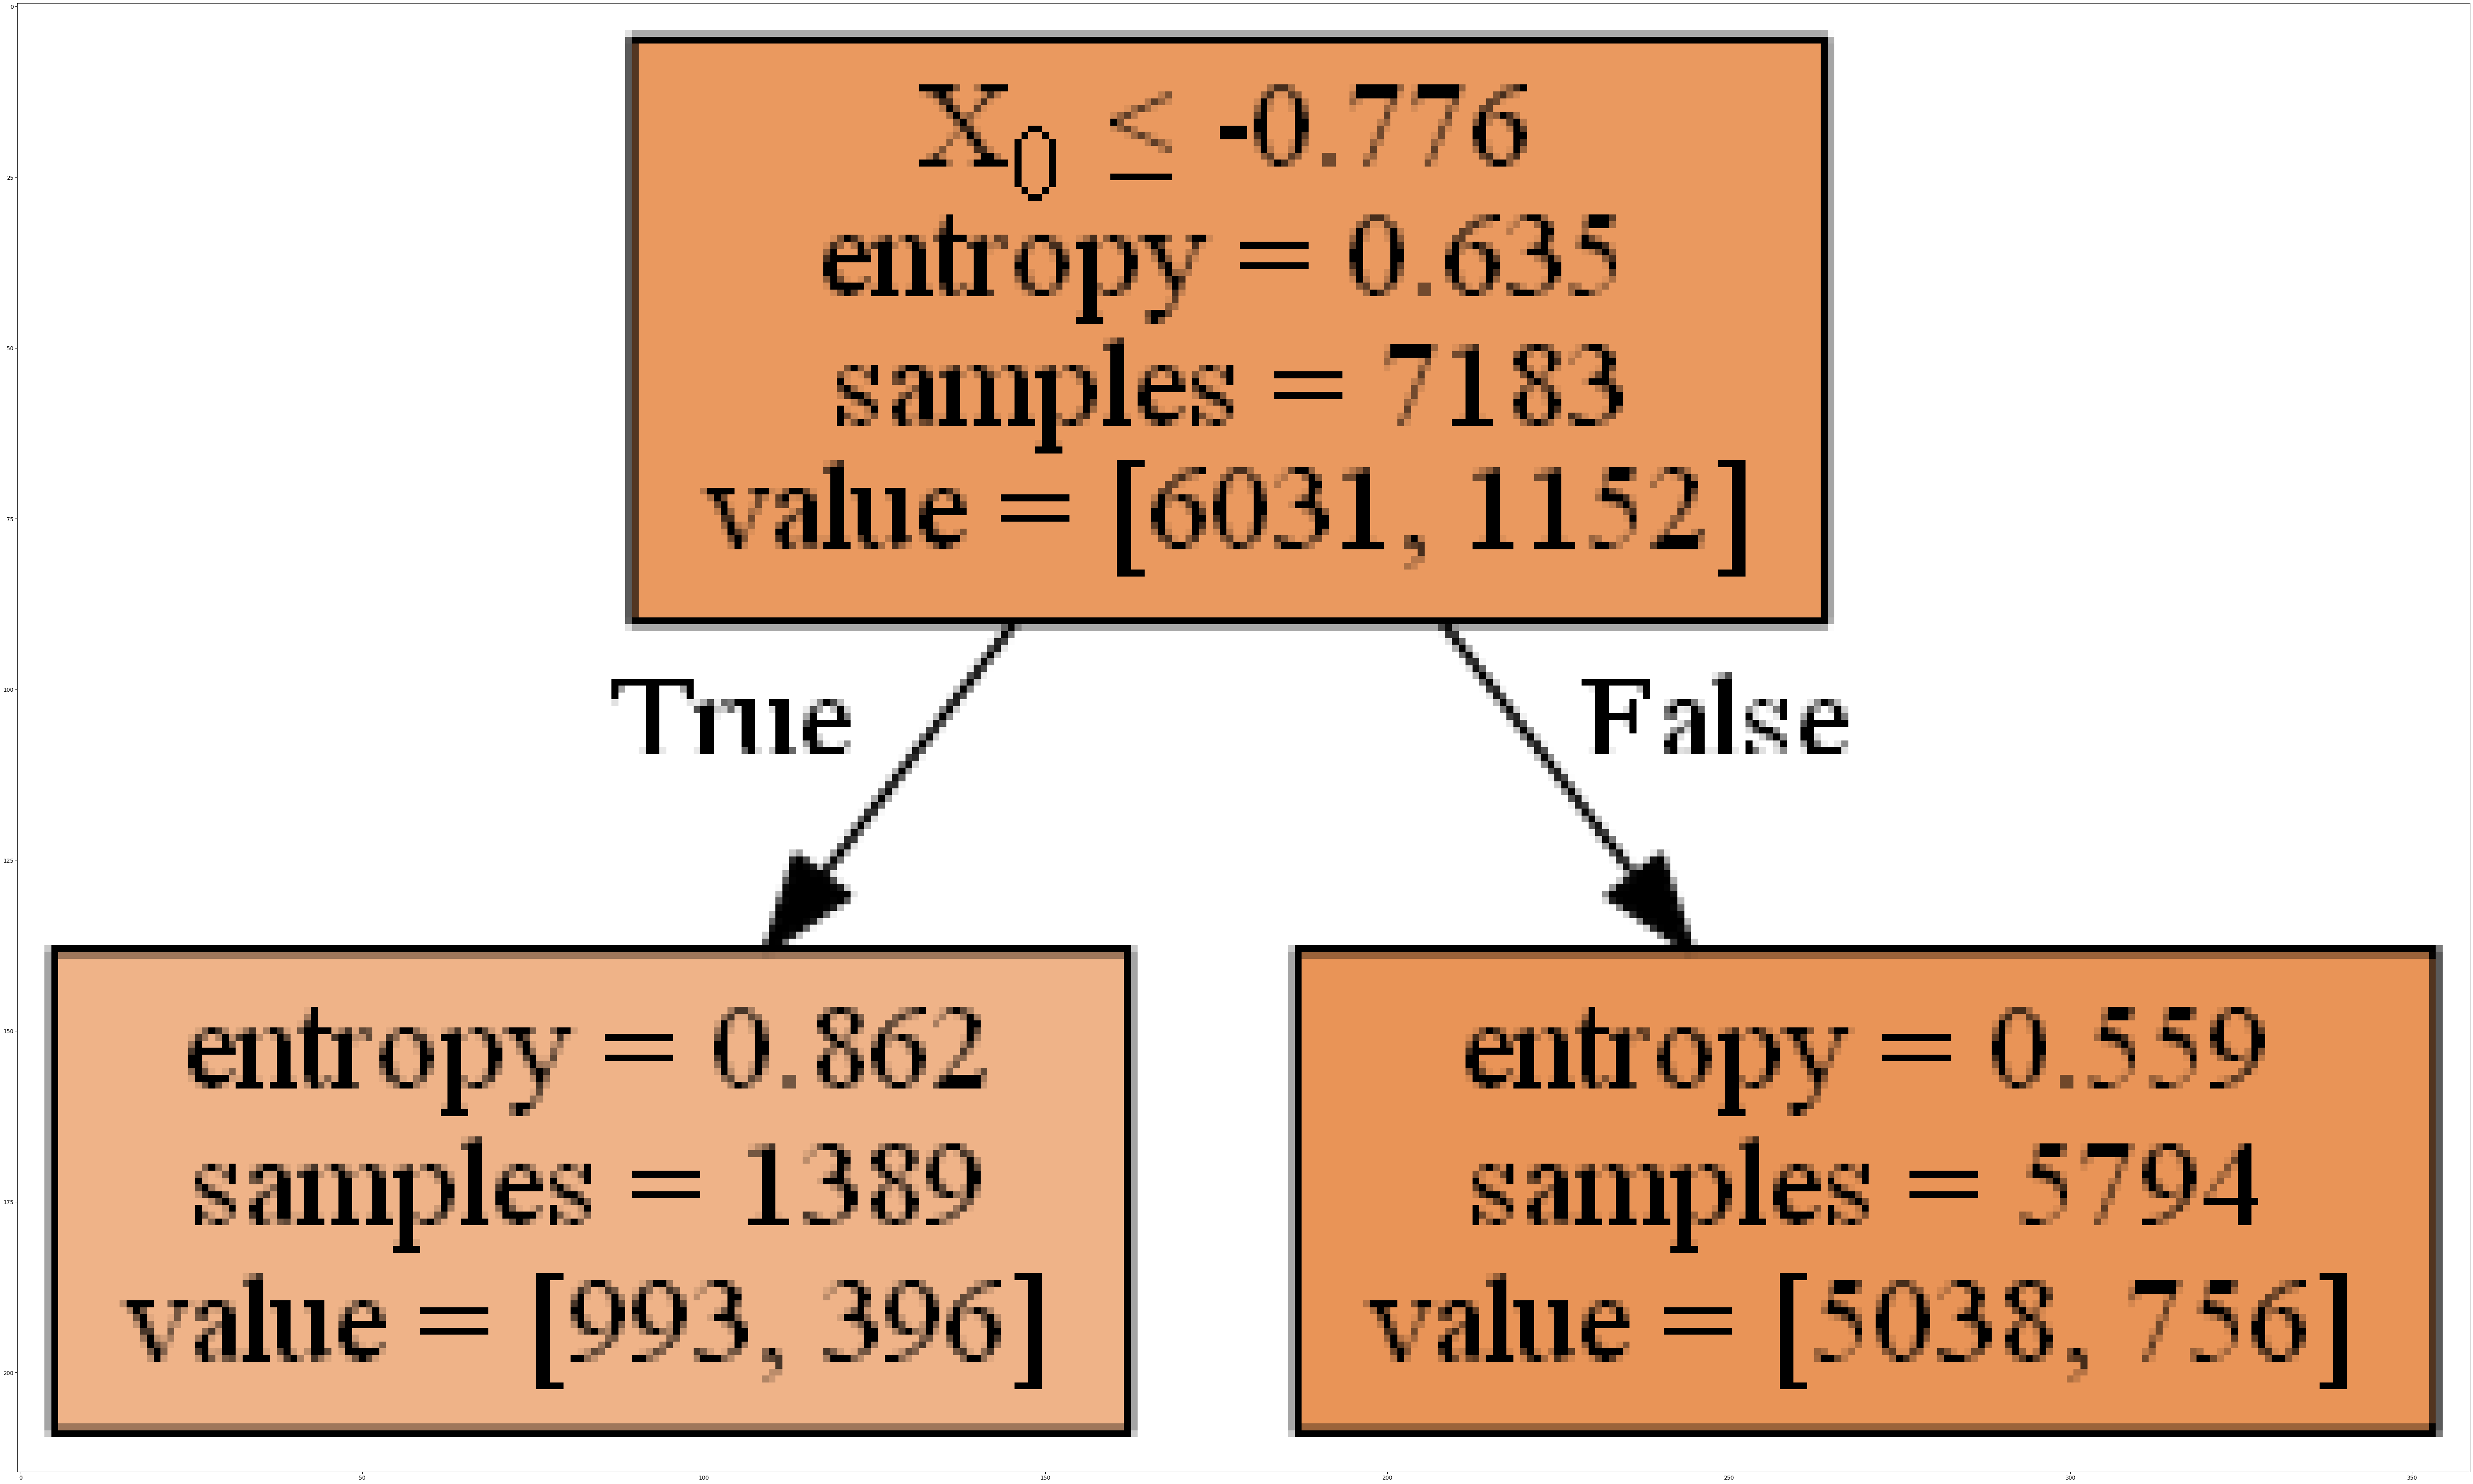

In [32]:
dot_data = StringIO()
filename = "tree.png"
# featureNames = dataset.columns[0:12]
# targetNames = dataset["not.fully.paid"].unique().tolist()
out=tree.export_graphviz(classifier, out_file=dot_data, filled=True,  special_characters=True,rotate=False) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')